## This notebook contains Python code for visualizing potential data relationships between total flights, delays, weather

In [1]:
import pandas as pd
import numpy as np

import pymysql as mysql
import getpass

import matplotlib.pyplot as plt
import seaborn as sns

We need to connect to MySQL server, and specifically connect to the `ads507airlines` database. Then we verify the connection with a SQL command to show all tables.

In [2]:
conn=mysql.connect(host='localhost',
                   port=int(3306),
                   user='root',
                   passwd=getpass.getpass('Enter password: '),
                   db='ads507airlines')

Enter password:  ···············


In [3]:
tableNames = pd.read_sql("""SHOW TABLES""", conn)

tableNames

,Tables_in_ads507airlines
0,airlines_all2018
1,airlines_all2019
2,airlines_all2020
3,airlines_all2021
4,airlines_all2022
...,...
144,yearly_timedelay_2018
145,yearly_timedelay_2019
146,yearly_timedelay_2020
147,yearly_timedelay_2021


In [4]:
for i in tableNames['Tables_in_ads507airlines']:
    print(i)

airlines_all2018
airlines_all2019
airlines_all2020
airlines_all2021
airlines_all2022
daily_delays_iah2018
daily_delays_iah2019
daily_delays_iah2020
daily_delays_iah2021
daily_delays_iah2022
daily_delays_jfk2018
daily_delays_jfk2019
daily_delays_jfk2020
daily_delays_jfk2021
daily_delays_jfk2022
daily_delays_san2018
daily_delays_san2019
daily_delays_san2020
daily_delays_san2021
daily_delays_san2022
daily_delays_sea2018
daily_delays_sea2019
daily_delays_sea2020
daily_delays_sea2021
daily_delays_sea2022
daily_weather_iah2018
daily_weather_iah2019
daily_weather_iah2020
daily_weather_iah2021
daily_weather_iah2022
daily_weather_jfk2018
daily_weather_jfk2019
daily_weather_jfk2020
daily_weather_jfk2021
daily_weather_jfk2022
daily_weather_san2018
daily_weather_san2019
daily_weather_san2020
daily_weather_san2021
daily_weather_san2022
daily_weather_sea2018
daily_weather_sea2019
daily_weather_sea2020
daily_weather_sea2021
daily_weather_sea2022
delays_weather_iah2018
delays_weather_iah2019
delays_we

Having established the MySQL connection, let's create 4 dataframes based on 4 *views* created in the database. These views cover 5 years of flight delays and weather data from each of 4 chosen airports:
- IAH - Houston Intercontinental Airport
- JFK - John F. Kennedy International Airport (NYC)
- SAN - San Diego International Airport
- SEA - Seattle-Tacoma International Airport

We also include some light data cleanup.

In [5]:
weather_delays_iah = pd.read_sql("""select * from delays_weather_iah_allyears;""", conn)
weather_delays_jfk = pd.read_sql("""select * from delays_weather_jfk_allyears;""", conn)
weather_delays_san = pd.read_sql("""select * from delays_weather_san_allyears;""", conn)
weather_delays_sea = pd.read_sql("""select * from delays_weather_sea_allyears;""", conn)

In [6]:
#convert daily_date object to datetime
weather_delays_iah['daily_date'] = pd.to_datetime(weather_delays_iah['daily_date'])
weather_delays_jfk['daily_date'] = pd.to_datetime(weather_delays_jfk['daily_date'])
weather_delays_san['daily_date'] = pd.to_datetime(weather_delays_san['daily_date'])
weather_delays_sea['daily_date'] = pd.to_datetime(weather_delays_sea['daily_date'])
#create a year column
weather_delays_iah['year'] = weather_delays_iah['daily_date'].dt.year
weather_delays_jfk['year'] = weather_delays_jfk['daily_date'].dt.year
weather_delays_san['year'] = weather_delays_san['daily_date'].dt.year
weather_delays_sea['year'] = weather_delays_sea['daily_date'].dt.year

In [7]:
weather_delays_iah

,daily_date,station,max_temp,daily_rain,total_flights,delays,delays_30,delays_60,delays_120,year
0,2018-01-01,IAH,46.9,0.0000,453,139.0,48.0,19.0,6.0,2018
1,2018-01-02,IAH,34.0,0.0000,483,162.0,59.0,30.0,10.0,2018
2,2018-01-03,IAH,46.9,0.0004,482,154.0,37.0,17.0,4.0,2018
3,2018-01-04,IAH,54.0,0.0000,472,100.0,26.0,13.0,4.0,2018
4,2018-01-05,IAH,55.9,0.0000,473,118.0,44.0,20.0,5.0,2018
...,...,...,...,...,...,...,...,...,...,...
1755,2022-10-26,IAH,73.9,0.0000,356,92.0,24.0,16.0,3.0,2022
1756,2022-10-27,IAH,75.9,0.0000,359,77.0,15.0,5.0,2.0,2022
1757,2022-10-28,IAH,70.0,1.3404,361,241.0,118.0,53.0,22.0,2022
1758,2022-10-29,IAH,66.9,0.1000,329,86.0,14.0,7.0,2.0,2022


## Daily Flights Across Time

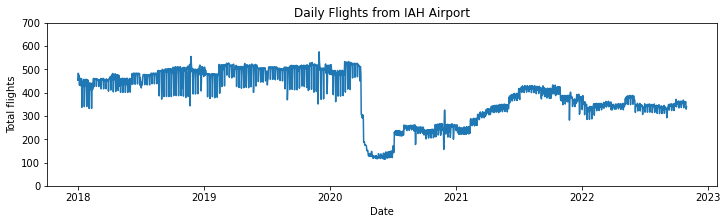

In [8]:
plt.figure(figsize=(12,3))
sns.lineplot(data=weather_delays_iah,x='daily_date',y='total_flights')
plt.ylim(0,700)
plt.xlabel("Date")
plt.ylabel("Total flights")
plt.title("Daily Flights from IAH Airport");

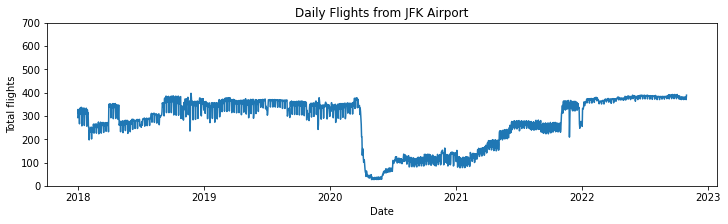

In [9]:
plt.figure(figsize=(12,3))
sns.lineplot(data=weather_delays_jfk,x='daily_date',y='total_flights')
plt.ylim(0,700)
plt.xlabel("Date")
plt.ylabel("Total flights")
plt.title("Daily Flights from JFK Airport");

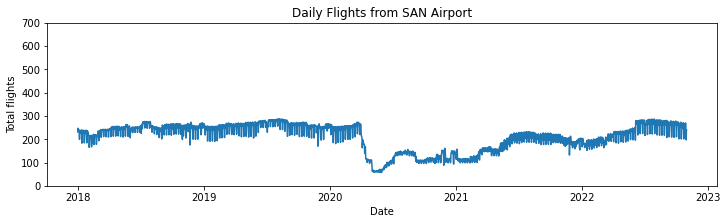

In [10]:
plt.figure(figsize=(12,3))
sns.lineplot(data=weather_delays_san,x='daily_date',y='total_flights')
plt.ylim(0,700)
plt.xlabel("Date")
plt.ylabel("Total flights")
plt.title("Daily Flights from SAN Airport");

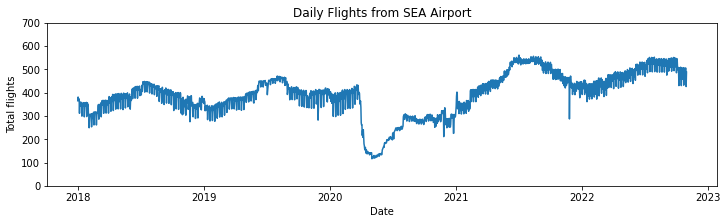

In [11]:
plt.figure(figsize=(12,3))
sns.lineplot(data=weather_delays_sea,x='daily_date',y='total_flights')
plt.ylim(0,700)
plt.xlabel("Date")
plt.ylabel("Total flights")
plt.title("Daily Flights from SEA Airport");

## Delays

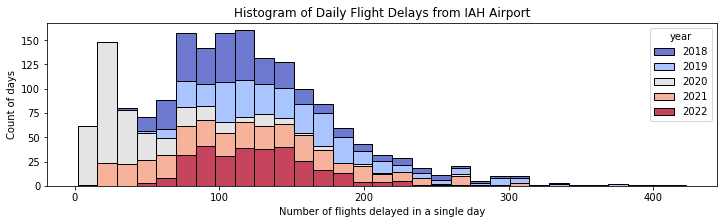

In [12]:
plt.figure(figsize=(12,3))
sns.histplot(data=weather_delays_iah,x='delays',#bins=100,
             hue='year',
             multiple='stack',
             palette='coolwarm')
#plt.ylim(0,700)
plt.xlabel("Number of flights delayed in a single day")
plt.ylabel("Count of days")
plt.title("Histogram of Daily Flight Delays from IAH Airport");

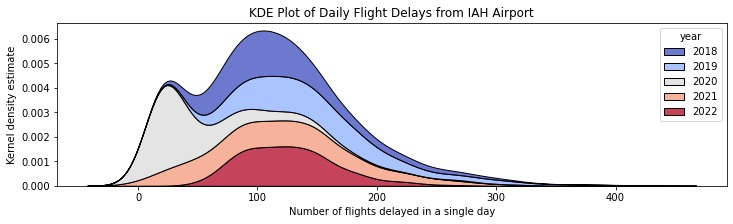

In [13]:
plt.figure(figsize=(12,3))
sns.kdeplot(data=weather_delays_iah,x='delays',#bins=100,
             hue='year',
             multiple='stack',
             palette='coolwarm')
#plt.ylim(0,700)
plt.xlabel("Number of flights delayed in a single day")
plt.ylabel("Kernel density estimate")
plt.title("KDE Plot of Daily Flight Delays from IAH Airport");

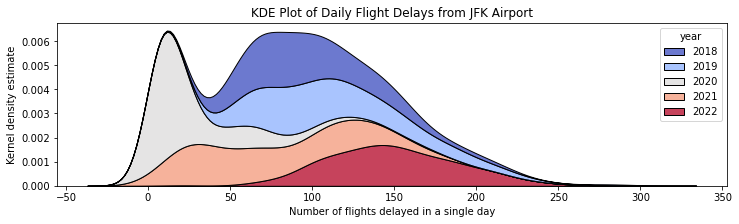

In [14]:
plt.figure(figsize=(12,3))
sns.kdeplot(data=weather_delays_jfk,x='delays',#bins=100,
             hue='year',
             multiple='stack',
             palette='coolwarm')
#plt.ylim(0,700)
plt.xlabel("Number of flights delayed in a single day")
plt.ylabel("Kernel density estimate")
plt.title("KDE Plot of Daily Flight Delays from JFK Airport");

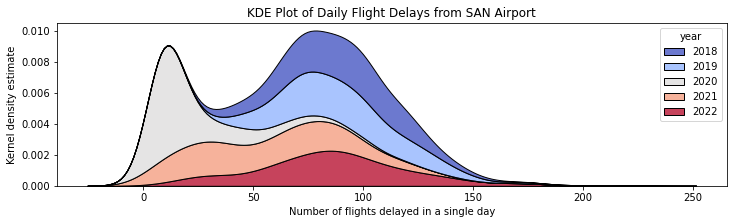

In [15]:
plt.figure(figsize=(12,3))
sns.kdeplot(data=weather_delays_san,x='delays',#bins=100,
             hue='year',
             multiple='stack',
             palette='coolwarm')
#plt.ylim(0,700)
plt.xlabel("Number of flights delayed in a single day")
plt.ylabel("Kernel density estimate")
plt.title("KDE Plot of Daily Flight Delays from SAN Airport");

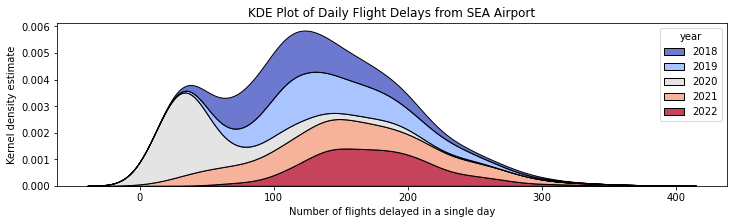

In [16]:
plt.figure(figsize=(12,3))
sns.kdeplot(data=weather_delays_sea,x='delays',#bins=100,
             hue='year',
             multiple='stack',
             palette='coolwarm')
#plt.ylim(0,700)
plt.xlabel("Number of flights delayed in a single day")
plt.ylabel("Kernel density estimate")
plt.title("KDE Plot of Daily Flight Delays from SEA Airport");

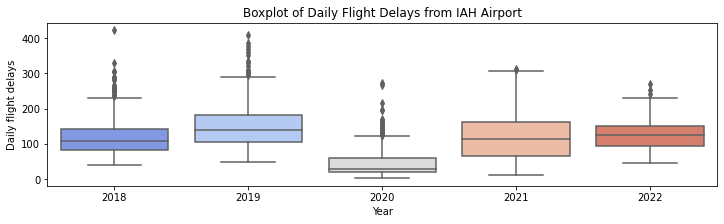

In [36]:
plt.figure(figsize=(12,3))
sns.boxplot(data=weather_delays_iah,y='delays',
             x='year',
             palette='coolwarm')
plt.xlabel("Year")
plt.ylabel("Daily flight delays")
plt.title("Boxplot of Daily Flight Delays from IAH Airport");

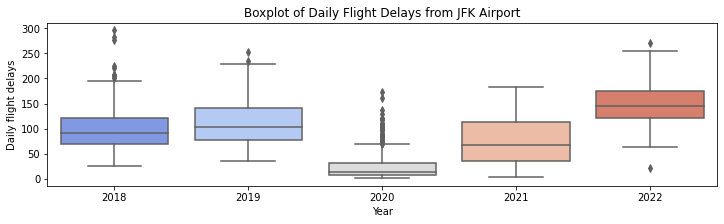

In [40]:
plt.figure(figsize=(12,3))
sns.boxplot(data=weather_delays_jfk,y='delays',
             x='year',
             palette='coolwarm')
plt.xlabel("Year")
plt.ylabel("Daily flight delays")
plt.title("Boxplot of Daily Flight Delays from JFK Airport");

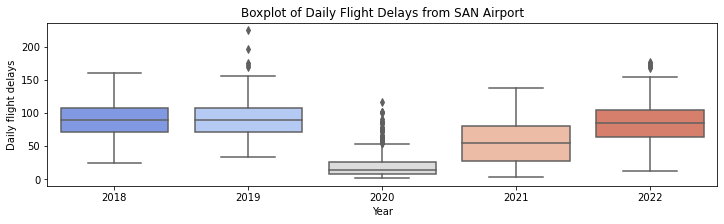

In [41]:
plt.figure(figsize=(12,3))
sns.boxplot(data=weather_delays_san,y='delays',
             x='year',
             palette='coolwarm')
plt.xlabel("Year")
plt.ylabel("Daily flight delays")
plt.title("Boxplot of Daily Flight Delays from SAN Airport");

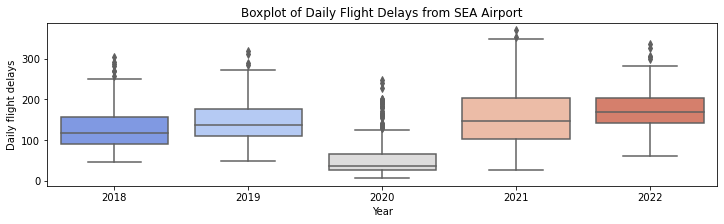

In [42]:
plt.figure(figsize=(12,3))
sns.boxplot(data=weather_delays_sea,y='delays',
             x='year',
             palette='coolwarm')
plt.xlabel("Year")
plt.ylabel("Daily flight delays")
plt.title("Boxplot of Daily Flight Delays from SEA Airport");

## Delays as a function of total flights

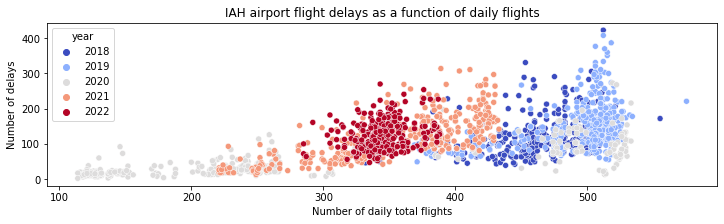

In [17]:
plt.figure(figsize=(12,3))
sns.scatterplot(data=weather_delays_iah,x='total_flights',y='delays',hue='year',palette='coolwarm')
plt.xlabel('Number of daily total flights')
plt.ylabel("Number of delays")
plt.title("IAH airport flight delays as a function of daily flights");

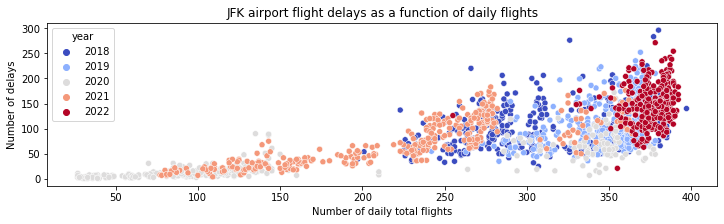

In [18]:
plt.figure(figsize=(12,3))
sns.scatterplot(data=weather_delays_jfk,x='total_flights',y='delays',hue='year',palette='coolwarm')
plt.xlabel('Number of daily total flights')
plt.ylabel("Number of delays")
plt.title("JFK airport flight delays as a function of daily flights");

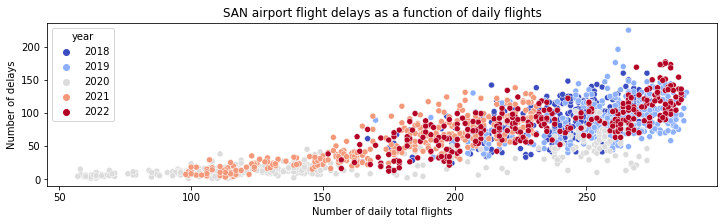

In [19]:
plt.figure(figsize=(12,3))
sns.scatterplot(data=weather_delays_san,x='total_flights',y='delays',hue='year',palette='coolwarm')
plt.xlabel('Number of daily total flights')
plt.ylabel("Number of delays")
plt.title("SAN airport flight delays as a function of daily flights");

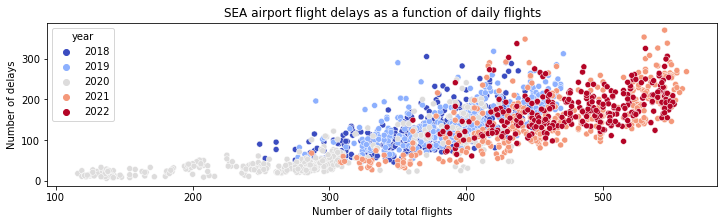

In [20]:
plt.figure(figsize=(12,3))
sns.scatterplot(data=weather_delays_sea,x='total_flights',y='delays',hue='year',palette='coolwarm')
plt.xlabel('Number of daily total flights')
plt.ylabel("Number of delays")
plt.title("SEA airport flight delays as a function of daily flights");

## Delays as a function of daily rainfall

Text(0.5, 1.0, 'IAH airport delays as a function of daily rainfall')

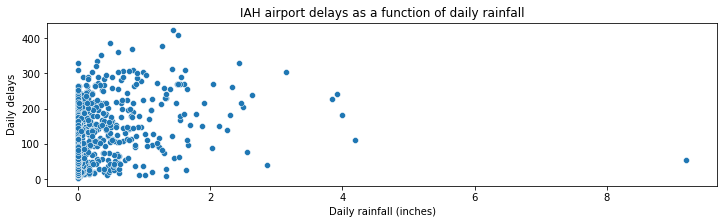

In [21]:
plt.figure(figsize=(12,3))
sns.scatterplot(data=weather_delays_iah,x='daily_rain',y='delays')
plt.xlabel('Daily rainfall (inches)')
plt.ylabel('Daily delays')
plt.title('IAH airport delays as a function of daily rainfall')

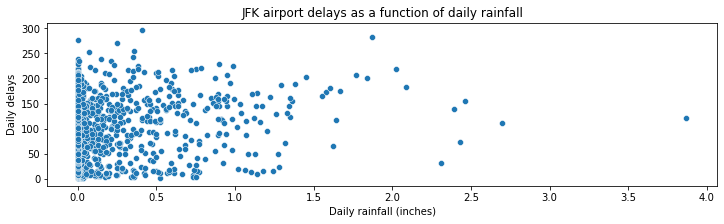

In [22]:
plt.figure(figsize=(12,3))
sns.scatterplot(data=weather_delays_jfk,x='daily_rain',y='delays')
plt.xlabel('Daily rainfall (inches)')
plt.ylabel('Daily delays')
plt.title('JFK airport delays as a function of daily rainfall');

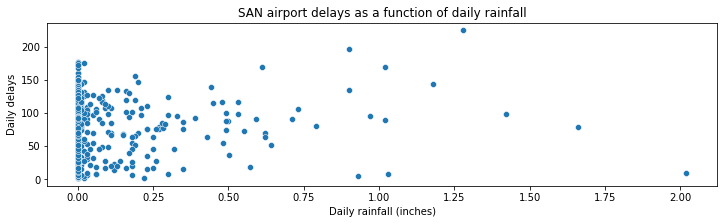

In [23]:
plt.figure(figsize=(12,3))
sns.scatterplot(data=weather_delays_san,x='daily_rain',y='delays')
plt.xlabel('Daily rainfall (inches)')
plt.ylabel('Daily delays')
plt.title('SAN airport delays as a function of daily rainfall');

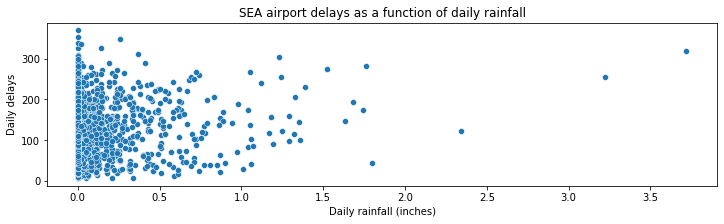

In [24]:
plt.figure(figsize=(12,3))
sns.scatterplot(data=weather_delays_sea,x='daily_rain',y='delays')
plt.xlabel('Daily rainfall (inches)')
plt.ylabel('Daily delays')
plt.title('SEA airport delays as a function of daily rainfall');

## Delays as a function of max temperature

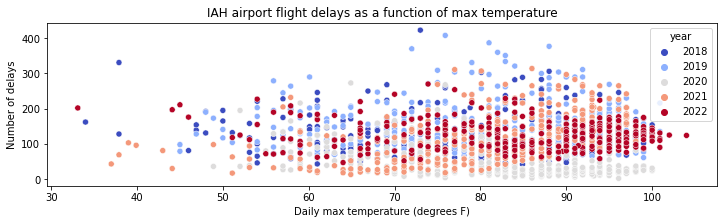

In [25]:
plt.figure(figsize=(12,3))
sns.scatterplot(data=weather_delays_iah,x='max_temp',y='delays',hue='year',palette='coolwarm')
plt.xlabel('Daily max temperature (degrees F)')
plt.ylabel("Number of delays")
plt.title("IAH airport flight delays as a function of max temperature");

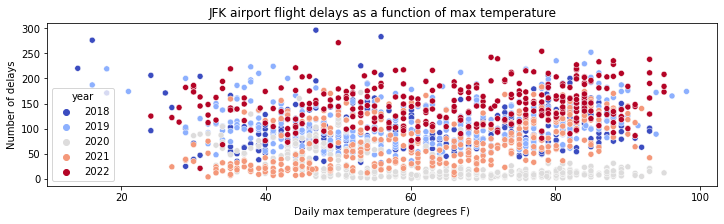

In [26]:
plt.figure(figsize=(12,3))
sns.scatterplot(data=weather_delays_jfk,x='max_temp',y='delays',hue='year',palette='coolwarm')
plt.xlabel('Daily max temperature (degrees F)')
plt.ylabel("Number of delays")
plt.title("JFK airport flight delays as a function of max temperature");

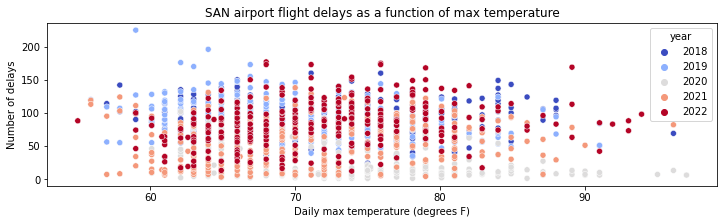

In [27]:
plt.figure(figsize=(12,3))
sns.scatterplot(data=weather_delays_san,x='max_temp',y='delays',hue='year',palette='coolwarm')
plt.xlabel('Daily max temperature (degrees F)')
plt.ylabel("Number of delays")
plt.title("SAN airport flight delays as a function of max temperature");

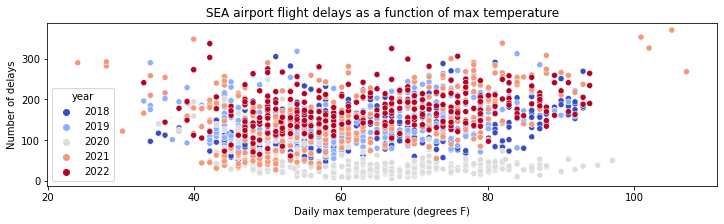

In [28]:
plt.figure(figsize=(12,3))
sns.scatterplot(data=weather_delays_sea,x='max_temp',y='delays',hue='year',palette='coolwarm')
plt.xlabel('Daily max temperature (degrees F)')
plt.ylabel("Number of delays")
plt.title("SEA airport flight delays as a function of max temperature");